In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
Measurement

sqlalchemy.ext.automap.measurement

In [9]:
Station

sqlalchemy.ext.automap.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
rec_date = session.query(func.max(Measurement.date)).first()[0]
rec_date

'2017-08-23'

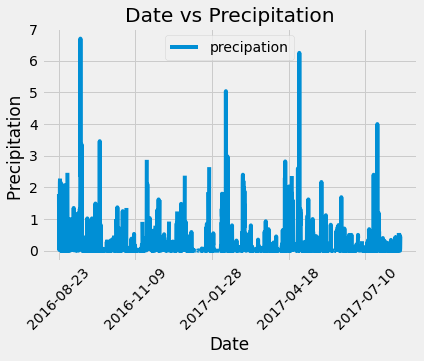

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = dt.date(2017,8,23)
#last_date

one_yr = dt.timedelta(days=365)
#print(one_yr)
prev_yrs = last_date - one_yr

#print(prev_yrs)

# Perform a query to retrieve the data and precipitation scores

prec_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= prev_yrs).all()
#prec_scores

# Save the query results as a Pandas DataFrame and set the index to the date column

prec_scores_df = pd.DataFrame(prec_scores, columns=['date', 'precipation'])
#prec_scores_df
#Sort the dataframe by date

prec_scores_df = prec_scores_df.sort_values('date')
prec_scores_df
# Use Pandas Plotting with Matplotlib to plot the data


prec_scores_df.plot(x='date', y='precipation', rot=45)

plt.xlabel('Date')
plt.ylabel('Precipitation ')
plt.title('Date vs Precipitation')
plt.show()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_scores_df.describe().T


,count,mean,std,min,25%,50%,75%,max
precipation,2021.0,0.177279,0.46119,0.0,0.0,0.02,0.13,6.7


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_num = session.query(func.count(Station.station)).all()[0][0]
total_num

9

In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
row_stats = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


row_stats 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [76]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#highest temp
act_station_max = session.query(func.max(Measurement.tobs)).all()[0][0]
act_station_max

87.0

In [77]:
act_station_min = session.query(func.min(Measurement.tobs)).all()[0][0]
act_station_min

53.0

In [82]:
act_station_mean = session.query(func.avg(Measurement.tobs)).all()[0][0]
act_station_mean

73.09795396419437

In [163]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram 

one_yr = dt.timedelta(days=365)

prev_yrs = last_date - one_yr

active = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= prev_yrs).all()

new_df = pd.DataFrame(active)
new_df.T


,0,1,2,3,4,5,6,7,8,9,...,342,343,344,345,346,347,348,349,350,351
tobs,77.0,77.0,80.0,80.0,75.0,73.0,78.0,77.0,78.0,80.0,...,76.0,77.0,82.0,83.0,77.0,77.0,77.0,76.0,76.0,79.0


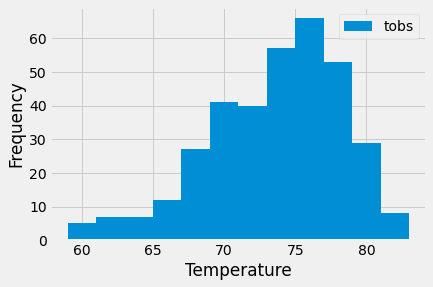

In [161]:


plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.hist(new_df, bins=12)
plt.legend(['tobs'], loc='upper right')
plt.show()

# Close session

In [18]:
# Close Session
session.close()